In [0]:
%pip install arviz
%pip install graphviz
%pip install pymc==5.0.0

Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.
  Attempting uninstall: pytensor
    Found existing installation: pytensor 2.11.2
    Not uninstalling pytensor at /local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-5807c7cc-cace-441d-bcad-6e5e425da78c
    Can't uninstall 'pytensor'. No files were found to uninstall.
  Attempting uninstall: pymc
    Found existing installation: pymc 5.3.1
    Not uninstalling pymc at /local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-5807c7cc-cace-441d-bcad-6e5e425da78c
    Can't uninstall 'pymc'. No files were found to uninstall.
Python interpreter will be restarted.


In [0]:
import arviz as az
import numpy as np
import pandas as pd
import pymc as pm
from matplotlib import pyplot as plt

In [0]:
RANDOM_SEED = 8929
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
CHANGE = 150
STEPS = 200
SAMPLES = 1000

In [0]:
def plot_fits(idata, idata_preds):
    palette = "plasma"
    cmap = plt.get_cmap(palette)
    percs = np.linspace(51, 99, 100)
    colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
    mosaic = """AABB
                CCCC"""
    fig, axs = plt.subplot_mosaic(mosaic, sharex=False, figsize=(20, 10))
    axs = [axs[k] for k in axs.keys()]
    for i, p in enumerate(percs[::-1]):
        upper = np.percentile(
            az.extract(idata, group="prior_predictive", num_samples=SAMPLES)["yhat"],
            p,
            axis=1,
        )
        lower = np.percentile(
            az.extract(idata, group="prior_predictive", num_samples=SAMPLES)["yhat"],
            100 - p,
            axis=1,
        )
        color_val = colors[i]
        axs[0].fill_between(
            x=idata["constant_data"]["t"],
            y1=upper.flatten(),
            y2=lower.flatten(),
            color=cmap(color_val),
            alpha=0.1,
        )

    axs[0].plot(
        az.extract(idata, group="prior_predictive", num_samples=SAMPLES)["yhat"].mean(
            axis=1
        ),
        color="cyan",
        label="Prior Predicted Mean Realisation",
    )

    axs[0].scatter(
        x=idata["constant_data"]["t"],
        y=idata["constant_data"]["y"],
        color="k",
        label="Observed Data points",
    )
    axs[0].set_title("Prior Predictive Fit", fontsize=20)
    axs[0].legend()

    for i, p in enumerate(percs[::-1]):
        upper = np.percentile(
            az.extract(idata_preds, group="predictions", num_samples=SAMPLES)["yhat"],
            p,
            axis=1,
        )
        lower = np.percentile(
            az.extract(idata_preds, group="predictions", num_samples=SAMPLES)["yhat"],
            100 - p,
            axis=1,
        )
        color_val = colors[i]
        axs[2].fill_between(
            x=idata_preds["predictions_constant_data"]["t"],
            y1=upper.flatten(),
            y2=lower.flatten(),
            color=cmap(color_val),
            alpha=0.1,
        )

        upper = np.percentile(
            az.extract(idata_preds, group="predictions", num_samples=SAMPLES)["yhat_fut"],
            p,
            axis=1,
        )
        lower = np.percentile(
            az.extract(idata_preds, group="predictions", num_samples=SAMPLES)["yhat_fut"],
            100 - p,
            axis=1,
        )
        color_val = colors[i]
        axs[2].fill_between(
            x=idata_preds["predictions"].coords["obs_id_fut"].data,
            y1=upper.flatten(),
            y2=lower.flatten(),
            color=cmap(color_val),
            alpha=0.1,
        )

    axs[2].plot(
        az.extract(idata_preds, group="predictions", num_samples=SAMPLES)["yhat"].mean(
            axis=1
        ),
        color="cyan",
    )
    idata_preds.predictions.yhat_fut.mean(["chain", "draw"]).plot(
        ax=axs[2], color="cyan", label="Predicted Mean Realisation"
    )
    axs[2].scatter(
        x=idata["constant_data"]["t"],
        y=idata["constant_data"]["y"],
        color="k",
        label="Observed Data",
    )
    axs[2].set_ylim(bottom=-30, top=30)
    axs[2].set_title("Posterior Predictions Plotted", fontsize=20)
    axs[2].axvline(np.max(idata["constant_data"]["t"]), color="black")
    axs[2].legend()
    axs[2].set_xlabel("Time in Days")
    axs[0].set_xlabel("Time in Days")
    az.plot_ppc(idata, ax=axs[1])

In [0]:
def plot_fits_single(idata, idata_preds):
    palette = "plasma"
    cmap = plt.get_cmap(palette)
    percs = np.linspace(51, 99, 100)
    colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
    mosaic = """AAAA"""
    fig, axs = plt.subplot_mosaic(mosaic, sharex=False, figsize=(10, 5))
    axs = [axs[k] for k in axs.keys()]
    for i, p in enumerate(percs[::-1]):
        upper = np.percentile(
            az.extract(idata_preds, group="predictions", num_samples=SAMPLES)["yhat"],
            p,
            axis=1,
        )
        lower = np.percentile(
            az.extract(idata_preds, group="predictions", num_samples=SAMPLES)["yhat"],
            100 - p,
            axis=1,
        )
        color_val = colors[i]
        axs[0].fill_between(
            x=idata_preds["predictions_constant_data"]["t"],
            y1=upper.flatten(),
            y2=lower.flatten(),
            color=cmap(color_val),
            alpha=0.1,
        )

        upper = np.percentile(
            az.extract(idata_preds, group="predictions", num_samples=SAMPLES)["yhat_fut"],
            p,
            axis=1,
        )
        lower = np.percentile(
            az.extract(idata_preds, group="predictions", num_samples=SAMPLES)["yhat_fut"],
            100 - p,
            axis=1,
        )
        color_val = colors[i]
        axs[0].fill_between(
            x=idata_preds["predictions"].coords["obs_id_fut"].data,
            y1=upper.flatten(),
            y2=lower.flatten(),
            color=cmap(color_val),
            alpha=0.1,
        )

    axs[0].plot(
        az.extract(idata_preds, group="predictions", num_samples=SAMPLES)["yhat"].mean(
            axis=1
        ),
        color="cyan",
    )
    idata_preds.predictions.yhat_fut.mean(["chain", "draw"]).plot(
        ax=axs[0], color="cyan", label="Predicted Mean Realisation"
    )
    
    axs[0].scatter(
        x=idata["constant_data"]["t"],
        y=idata["constant_data"]["y"],
        color="k",
        label="Observed Data",
    )
    axs[0].set_ylim(bottom=-30, top=30)
    axs[0].set_title("Posterior Predictions Plotted", fontsize=20)
    axs[0].axvline(np.max(idata["constant_data"]["t"])+1, color="black")
    axs[0].legend()
    axs[0].set_xlabel("Time in Days")

In [0]:
def simulate_ar(intercept, coef1, coef2, noise=0.5, warmup=10, steps=STEPS, change=CHANGE):
    # We sample some extra warmup steps, to let the AR process stabilize
    draws = np.zeros(warmup + steps)
    # Initialize first draws at intercept
    draws[:2] = intercept
    for step in range(2, warmup + steps):
  
        draws[step] = (
            intercept
            + coef1 * draws[step - 1]
            + coef2 * draws[step - 2]
            + np.random.normal(0, noise)
        )
        
        if step == warmup + change:
          intercept = 0
          coef1 = 0.5
          coef2 = 0
          
    # Discard the warmup draws
    return draws[warmup:]

In [0]:
y_t = np.zeros(STEPS)
y_s = np.zeros(STEPS)
y_ar = np.zeros(STEPS)

# Add trend
prev = 0
for i in range(STEPS):
  if i < CHANGE:
    y_t[i] = prev - 0.1
    prev = y_t[i]
  else:
    y_t[i] =  prev + 0.1
    prev = y_t[i]
y_t = y_t
    
# Add seasonality
t_data = list(range(STEPS))
n_order = 10
periods = np.array(t_data) / 7
fourier_features = pd.DataFrame(
    {
        f"{func}_order_{order}": getattr(np, func)(2 * np.pi * periods * order)
        for order in range(1, n_order + 1)
        for func in ("sin", "cos")
    }
)
y_s = 2 * fourier_features["sin_order_1"]

# Add AR process
y_ar = simulate_ar(0, -0.5, 0.5, steps=STEPS, change=CHANGE)

# Summing all up
observed = y_t + y_s + y_ar

Out[7]: Text(0.5, 1.0, 'AR')

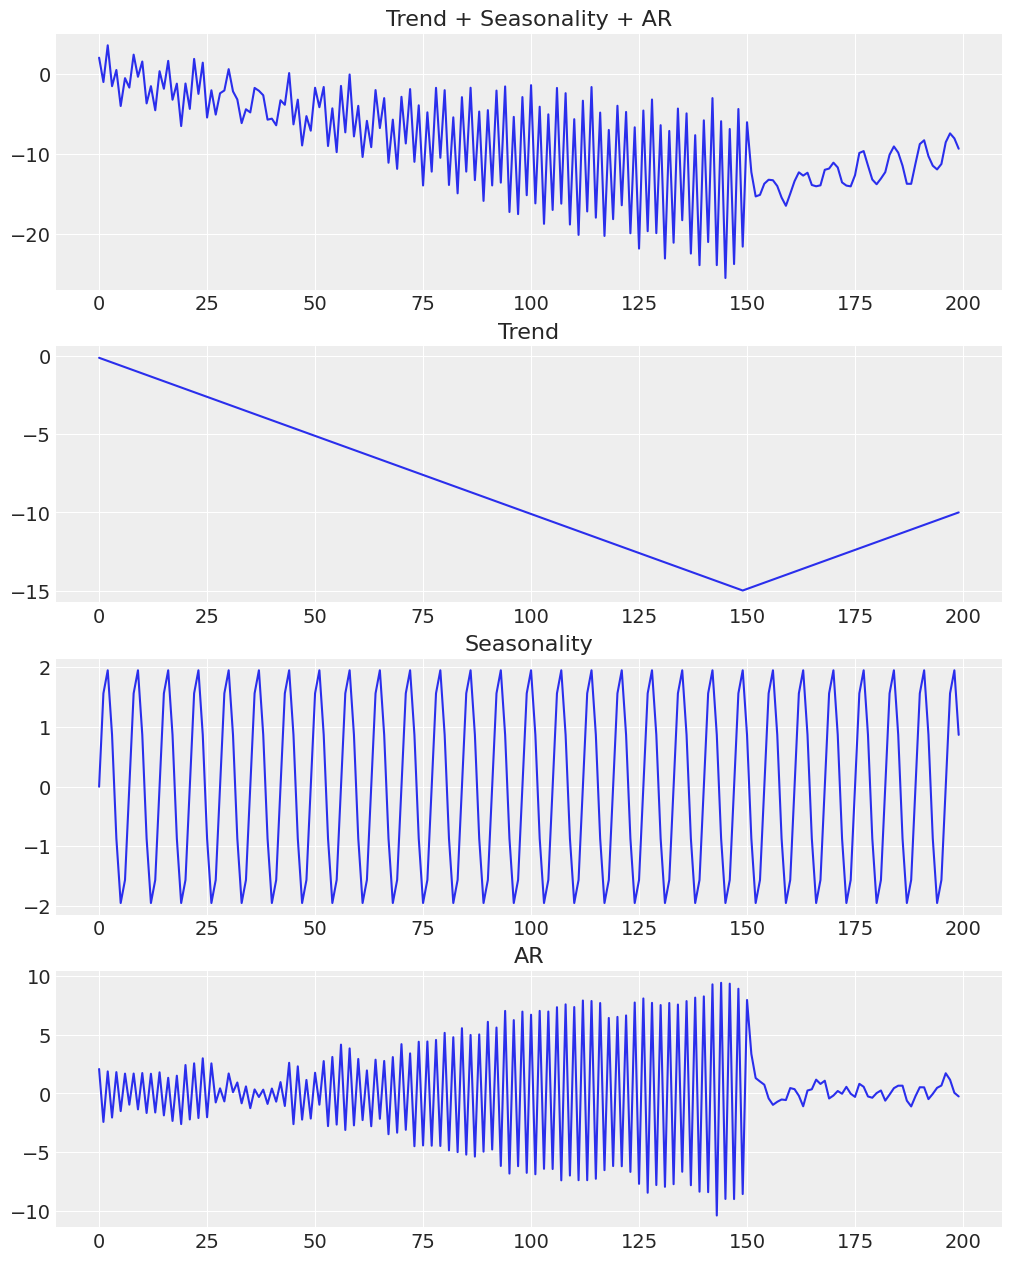

In [0]:
# Plot time series
fig, axs = plt.subplots(4, figsize=(10, 12.5))
axs[0].plot(observed)
axs[0].set_title("Trend + Seasonality + AR")
axs[1].plot(y_t)
axs[1].set_title("Trend")
axs[2].plot(y_s)
axs[2].set_title("Seasonality")
axs[3].plot(y_ar)
axs[3].set_title("AR")

In [0]:
def make_latent_AR_local_linear_trend_seasonal_model(
    observed, ff, priors, full_sample=True, samples=SAMPLES
):
    with pm.Model() as AR:
        pass
    
    ff = ff.to_numpy().T
    t_data = list(range(len(observed)))

    with AR:
        # Add the time interval as a mutable coordinate to the model to allow for future predictions
        AR.add_coord("obs_id", t_data, mutable=True)
        
        # The fourier features must be mutable to allow for addition fourier features to be passed in the prediction step.
        AR.add_coord("fourier_features", np.arange(len(ff)), mutable=True)

        # Data containers to enable prediction
        t = pm.MutableData("t", t_data, dims="obs_id")
        y = pm.MutableData("y", observed, dims="obs_id")

        # Observation noise
        sigma = pm.HalfNormal("sigma", priors["sigma"])
        
        # Priors for local linear trend components
        init = pm.Normal.dist(0, 1)
        nu = pm.GaussianRandomWalk("nu", mu=priors["nu"]["mu"], sigma=priors["nu"]["sigma"], init_dist=init, shape=len(t_data)-1)
        mu = pm.GaussianRandomWalk("mu", mu=nu, sigma=priors["mu"]["sigma"], init_dist=init, shape=len(t_data))
        trend = mu

        # Priors for seasonality components
        beta_fourier = pm.Normal(
            "beta_fourier",
            mu=priors["beta_fourier"]["mu"],
            sigma=priors["beta_fourier"]["sigma"],
            dims="fourier_features",
        )
        fourier_terms = pm.MutableData("fourier_terms", ff)
        seasonality = pm.Deterministic(
            "seasonality", pm.math.dot(beta_fourier, fourier_terms), dims="obs_id"
        )
        
        # Prior for AR components
        ## We need one init variable for each lag, hence size is variable too
        init = pm.Normal.dist(
            priors["init"]["mu"], priors["init"]["sigma"], size=priors["init"]["size"]
        )
        ## The first coefficient will be the intercept term
        coefs = pm.Normal("coefs", priors["coefs"]["mu"], priors["coefs"]["sigma"])
        # Steps of the AR model minus the lags required given specification
        ar = pm.AR(
            "ar",
            coefs,
            sigma=sigma,
            init_dist=init,
            constant=True,
            steps=t.shape[0] - (priors["coefs"]["size"] - 1),
            dims="obs_id",
        )

        # Likelihood
        yhat = pm.Normal("yhat", mu=trend+seasonality+ar, sigma=sigma, observed=y, dims="obs_id")
        
        ## Sampling
        idata = pm.sample_prior_predictive()
        if full_sample:
            idata.extend(pm.sample(SAMPLES, random_seed=100, target_accept=0.95))
            idata.extend(pm.sample_posterior_predictive(idata))
        else:
            return idata

    prediction_steps = observed.shape[0] + 50
    n = prediction_steps - observed.shape[0]
    n_order = 10
    periods = (observed.shape[0] + np.arange(n)) / 7
    fourier_features_new = pd.DataFrame(
        {
            f"{func}_order_{order}": getattr(np, func)(2 * np.pi * periods * order)
            for order in range(1, n_order + 1)
            for func in ("sin", "cos")
        }
    )

    with AR:
        AR.add_coords({"obs_id_fut_1": range(observed.shape[0] - 1, prediction_steps, 1)})
        AR.add_coords({"obs_id_fut": range(observed.shape[0], prediction_steps, 1)})
        t_fut = pm.MutableData(
            "t_fut", list(range(observed.shape[0], prediction_steps, 1)), dims="obs_id_fut"
        )
        ff_fut = pm.MutableData("ff_fut", fourier_features_new.to_numpy().T)

        trend_fut = pm.Deterministic("trend_fut", mu[-1] + nu[-1] * (t_fut - observed.shape[0]), dims="obs_id_fut")
        # condition on the learned values of the AR process
        # initialise the future AR process precisely at the last observed value in the AR process
        # using the special feature of the dirac delta distribution to be 0 probability everywhere else.
        ar_fut = pm.AR(
            "ar_fut",
            init_dist=pm.DiracDelta.dist(ar[..., -1]),
            rho=coefs,
            sigma=sigma,
            constant=True,
            dims="obs_id_fut_1",
        )
        seasonality_fut = pm.Deterministic(
            "seasonality_fut", pm.math.dot(beta_fourier, ff_fut), dims="obs_id_fut"
        )

        yhat_fut = pm.Normal("yhat_fut", mu=trend_fut+seasonality_fut+ar_fut[1:], sigma=sigma, dims="obs_id_fut")

        # use the updated values and predict outcomes and probabilities:
        idata_preds = pm.sample_posterior_predictive(
            idata, var_names=["yhat", "yhat_fut"], predictions=True, random_seed=743
        )

    return idata, idata_preds, AR

In [0]:
priors = {
    "coefs": {"mu": [0.2, 0.2], "sigma": [0.5, 0.03], "size": 2},
    "nu": {"mu": 0, "sigma": 1},
    "mu": {"sigma": 1},
    "trend": {"sigma": 0.1},
    "beta_fourier": {"mu": 0, "sigma": 2},
    "sigma": 1,
    "init": {"mu": -4, "sigma": 0.1, "size": 1},
}

idata, idata_preds, model = make_latent_AR_local_linear_trend_seasonal_model(observed, fourier_features, priors)

Sampling: [ar, beta_fourier, coefs, mu, nu, sigma, yhat]
/local_disk0/.ephemeral_nfs/envs/pythonEnv-5807c7cc-cace-441d-bcad-6e5e425da78c/lib/python3.9/site-packages/pymc/logprob/joint_logprob.py:167: UserWarning: Found a random variable that was neither among the observations nor the conditioned variables: [normal_rv{0, (0, 0), floatX, False}.0, normal_rv{0, (0, 0), floatX, False}.out]
  warnings.warn(
/local_disk0/.ephemeral_nfs/envs/pythonEnv-5807c7cc-cace-441d-bcad-6e5e425da78c/lib/python3.9/site-packages/pymc/logprob/joint_logprob.py:167: UserWarning: Found a random variable that was neither among the observations nor the conditioned variables: [normal_rv{0, (0, 0), floatX, False}.0, normal_rv{0, (0, 0), floatX, False}.out]
  warnings.warn(
/local_disk0/.ephemeral_nfs/envs/pythonEnv-5807c7cc-cace-441d-bcad-6e5e425da78c/lib/python3.9/site-packages/pymc/logprob/joint_logprob.py:167: UserWarning: Found a random variable that was neither among the observations nor the conditioned varia

In [0]:
az.summary(idata)

mean 
 sd 
 hdi_3% 
 hdi_97% 
 mcse_mean 
 mcse_sd 
 ess_bulk 
 ess_tail 
 r_hat 
 
 
 
 
 nu[0] 
 -0.206 
 0.808 
 -1.641 
 1.377 
 0.016 
 0.011 
 2592.0 
 2900.0 
 1.00 
 
 
 nu[1] 
 -0.303 
 0.923 
 -2.102 
 1.374 
 0.021 
 0.015 
 1987.0 
 2749.0 
 1.00 
 
 
 nu[2] 
 -0.363 
 0.922 
 -2.025 
 1.348 
 0.020 
 0.014 
 2027.0 
 2654.0 
 1.00 
 
 
 nu[3] 
 -0.300 
 0.934 
 -2.193 
 1.300 
 0.018 
 0.013 
 2689.0 
 3358.0 
 1.00 
 
 
 nu[4] 
 -0.263 
 0.935 
 -2.084 
 1.416 
 0.019 
 0.014 
 2509.0 
 2732.0 
 1.00 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 seasonality[195] 
 -0.370 
 1.906 
 -4.151 
 2.909 
 0.088 
 0.062 
 469.0 
 1159.0 
 1.01 
 
 
 seasonality[196] 
 1.286 
 1.781 
 -2.093 
 4.589 
 0.084 
 0.059 
 450.0 
 989.0 
 1.01 
 
 
 seasonality[197] 
 2.465 
 1.827 
 -0.938 
 5.862 
 0.086 
 0.060 
 459.0 
 984.0 
 1.01 
 
 
 seasonality[198] 
 2.853 
 1.860 
 -0.409 
 6.505 
 0.087 
 0.061 
 459.0 
 1155.0 
 1.01 
 
 
 seasonality[199] 
 1.713 
 1.874 
 -1.702 
 5.244 
 0.087 
 0.062 
 461.0 
 930.0 
 1.01 
 
 
 
 822 rows × 9 columns

Out[11]: array([[<AxesSubplot:title={'center':'nu'}>,
        <AxesSubplot:title={'center':'nu'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'beta_fourier'}>,
        <AxesSubplot:title={'center':'beta_fourier'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'coefs'}>,
        <AxesSubplot:title={'center':'coefs'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'ar'}>,
        <AxesSubplot:title={'center':'ar'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}, xlabel='Rank (all chains)'>],
       [<AxesSubplot:title={'center':'seasonality'}>,
        <AxesSubplot:title={'center':'seasonality'}, xlabel='Rank (all chains)'>]],
      dtype=object)

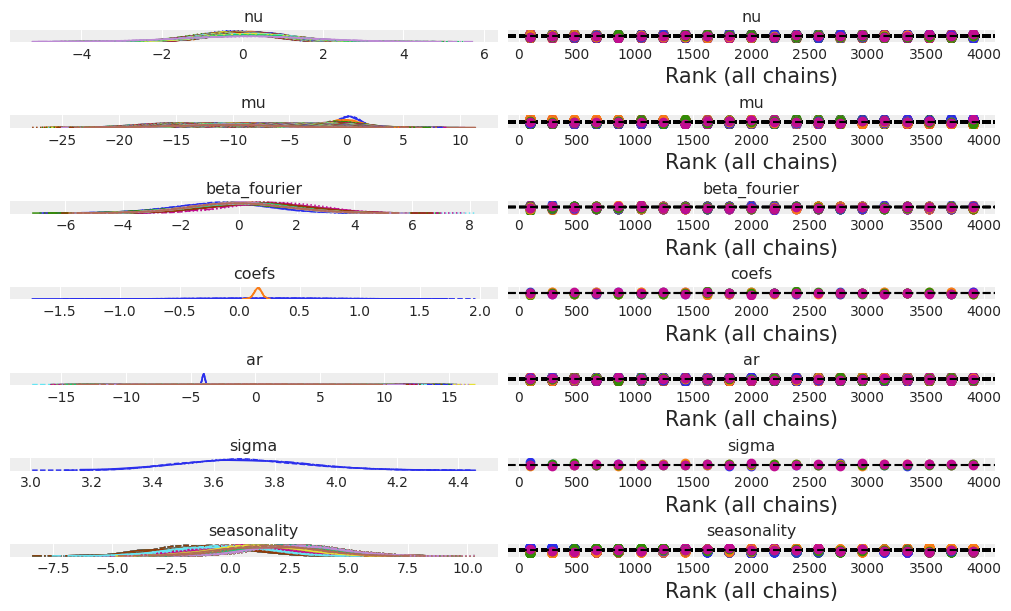

In [0]:
az.plot_trace(idata, figsize=(10, 6), kind="rank_vlines")

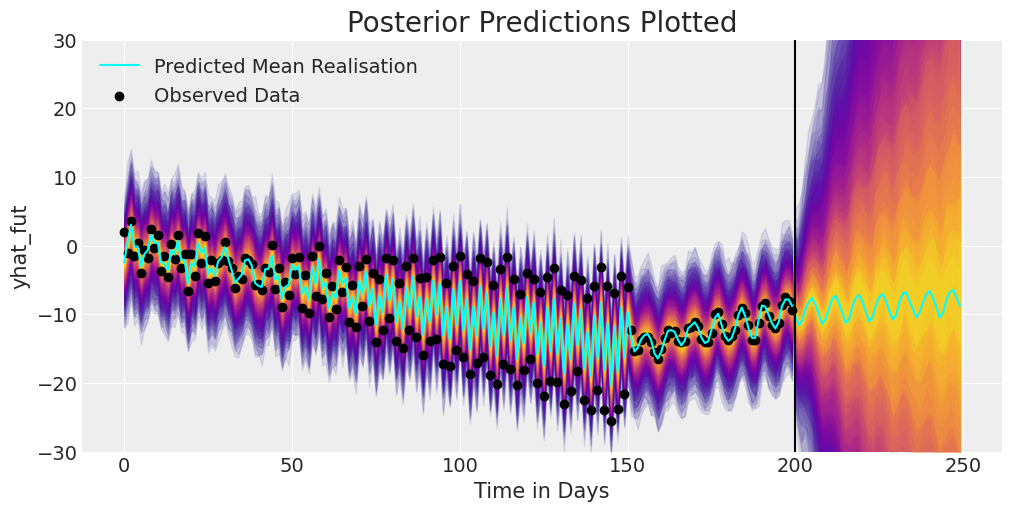

In [0]:
plot_fits_single(idata, idata_preds)

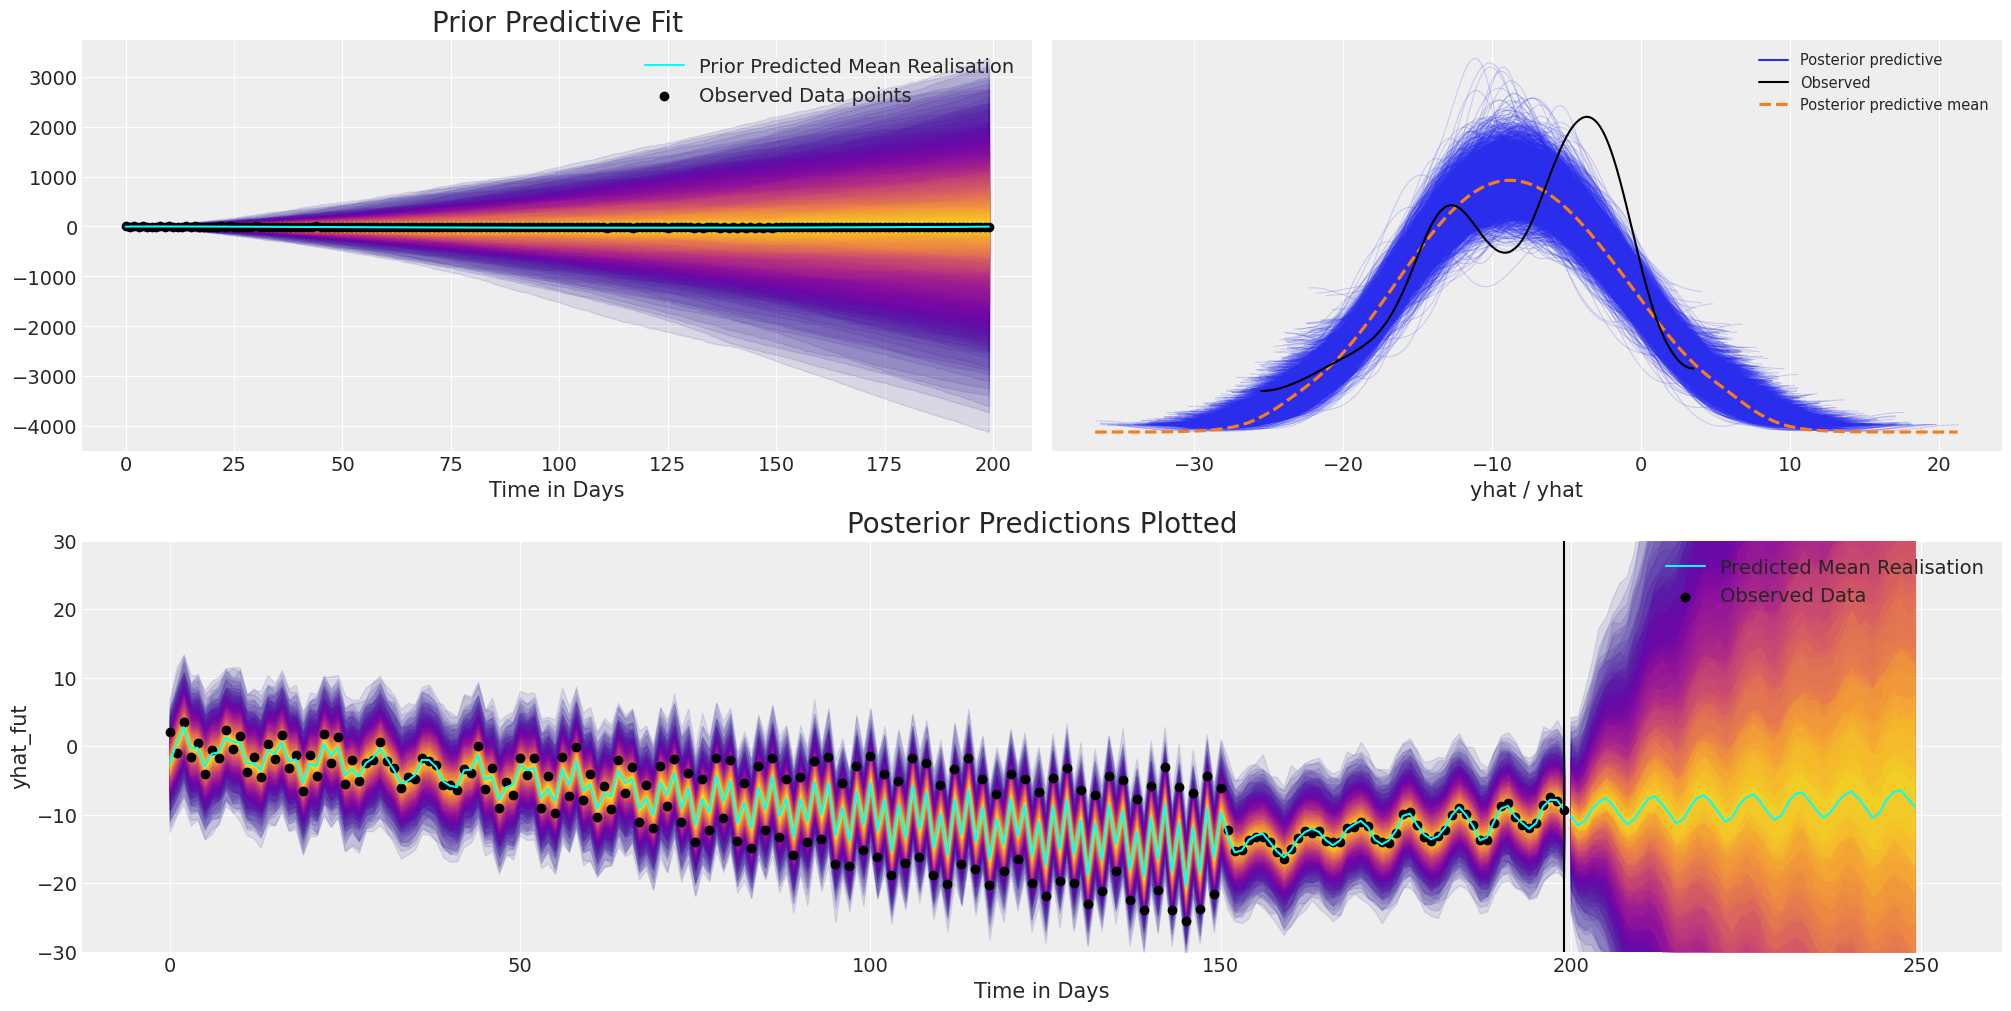

In [0]:
plot_fits(idata, idata_preds)